# Basic Data Visualizations

This notebook presents the basic data visualizations.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14

In [11]:
import matplotlib
matplotlib.__version__

'1.5.3'

### Bubble Plot

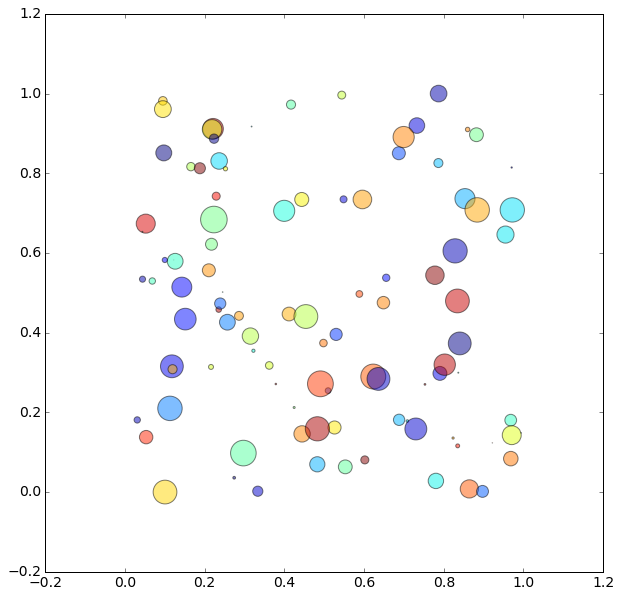

In [12]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plot = plt.scatter(x, y, s=area, c=colors, alpha=0.5)

### Box Plot

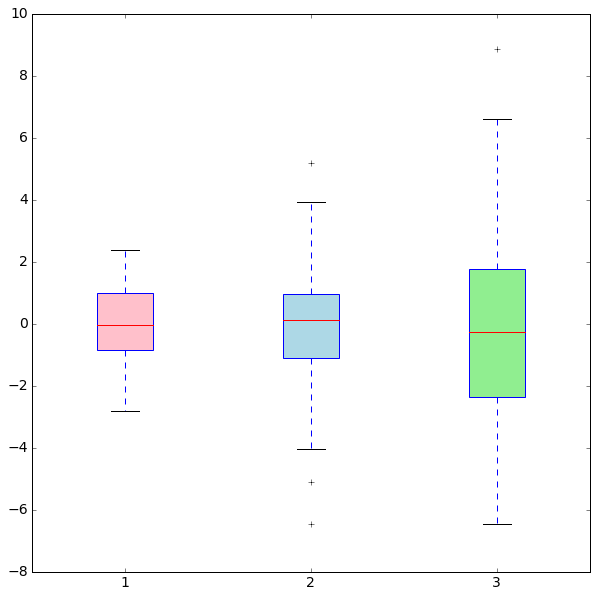

In [145]:
np.random.seed(123)

all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]


# rectangular box plot
bplot1 = plt.boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines


# add x-tick labels
plot = plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

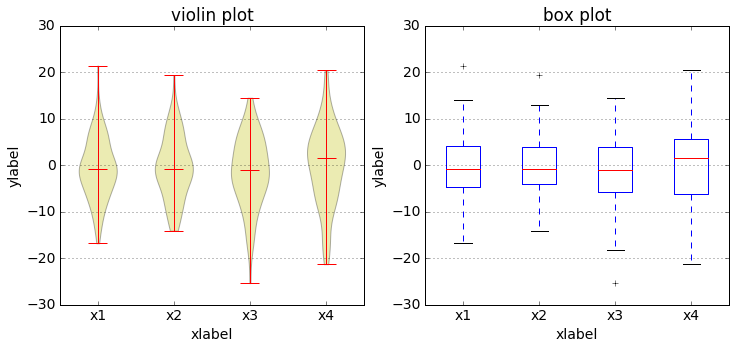

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plot = plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

## Sankey Diagram

In [14]:
from matplotlib.sankey import Sankey

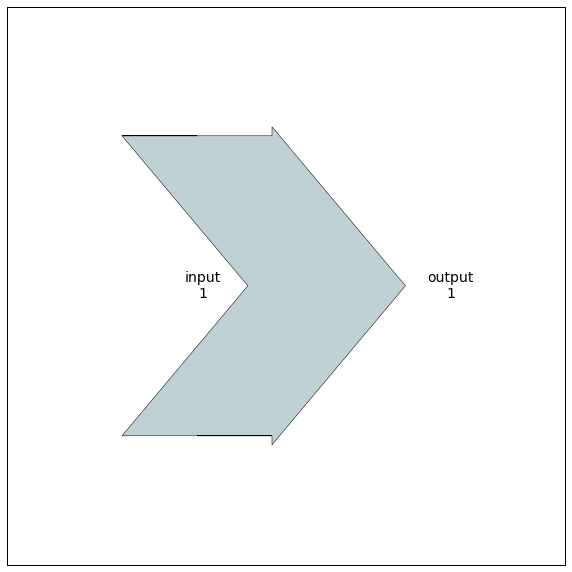

In [15]:
sankey = Sankey()
#inputs are positive, outputs are negative
s = sankey.add(flows=[1, -1],labels=['input', 'output'])
s = sankey.finish()

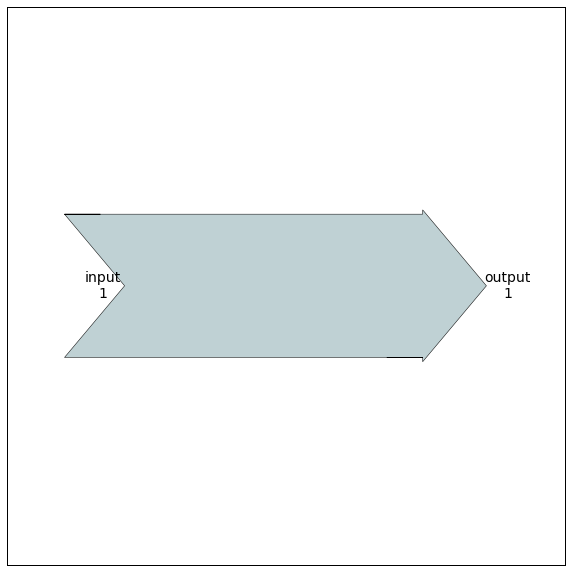

In [28]:
sankey = Sankey()
#inputs are positive, outputs are negative
s = sankey.add(flows=[1, -1],labels=['input', 'output'],trunklength=3)
s = sankey.finish()

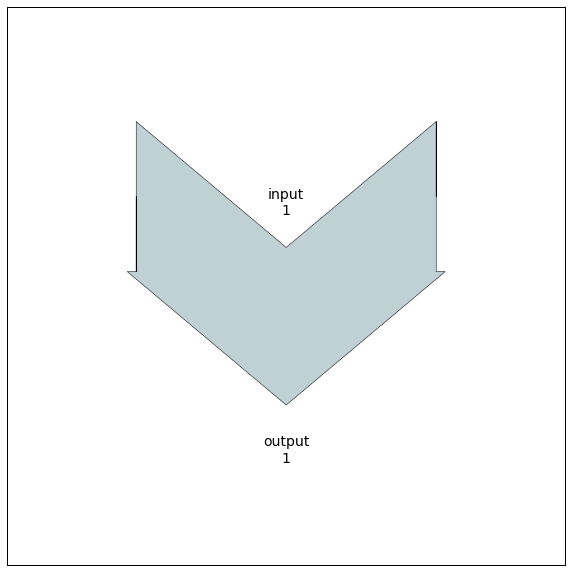

In [16]:
sankey = Sankey()
s = sankey.add(flows=[1, -1],labels=['input', 'output'],rotation=-90)
s = sankey.finish()

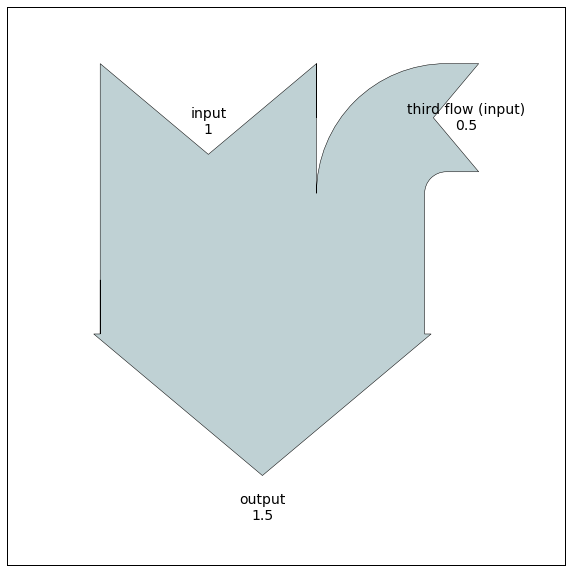

In [25]:
sankey = Sankey()
#orientations: 1 (from/to the top), 0 (from/to the left or right), or -1 (from/to the bottom)
s= sankey.add(flows=[1, -1.5, 0.5],
           orientations=[0, 0, 1],
           labels=['input', 'output', 'third flow (input)'],
           rotation=-90)
s = sankey.finish()

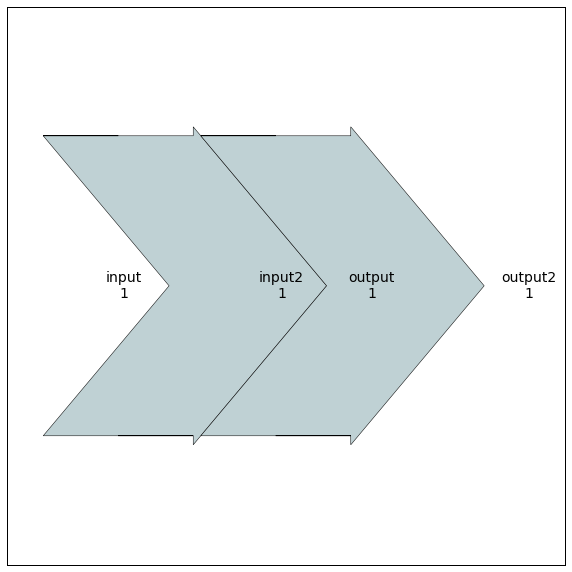

In [74]:
sankey = Sankey()

# first diagram, indexed by prior=0
sankey.add(flows=[1, -1],
       labels=['input', 'output'])

# second diagram indexed by prior=1
sankey.add(flows=[1, -1],
          labels=['input2', 'output2'],
          prior=0,
          connect=(1, 0))
s = sankey.finish()

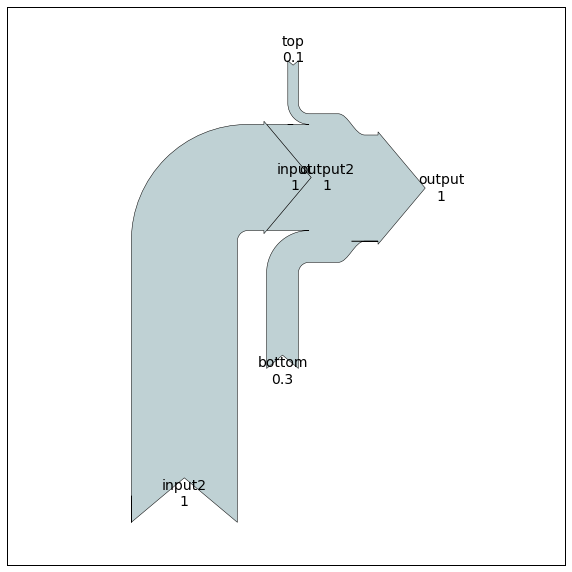

In [76]:
sankey = Sankey()
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1, 0.1, 0.3],
           orientations=[0, 0, 1, -1],
       labels=['input', 'output', 'top', 'bottom'],
          pathlengths=[0, 0, 0.5, 1.0])
sankey.add(flows=[1, -1],
           orientations=[0, -1],
           labels=['input2', 'output2'],
           trunklength=3.0,
          prior=0,
          connect=(0, 1))
s =sankey.finish()

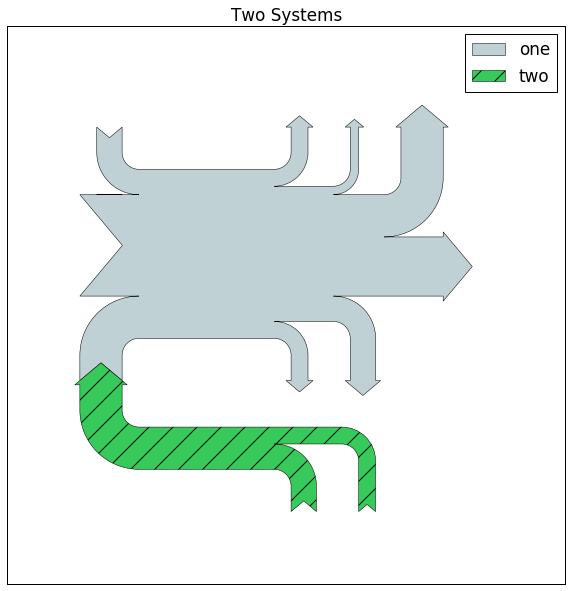

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Two Systems")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='one',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], fc='#37c959', label='two',
           orientations=[-1, 1, 1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend(loc='best')

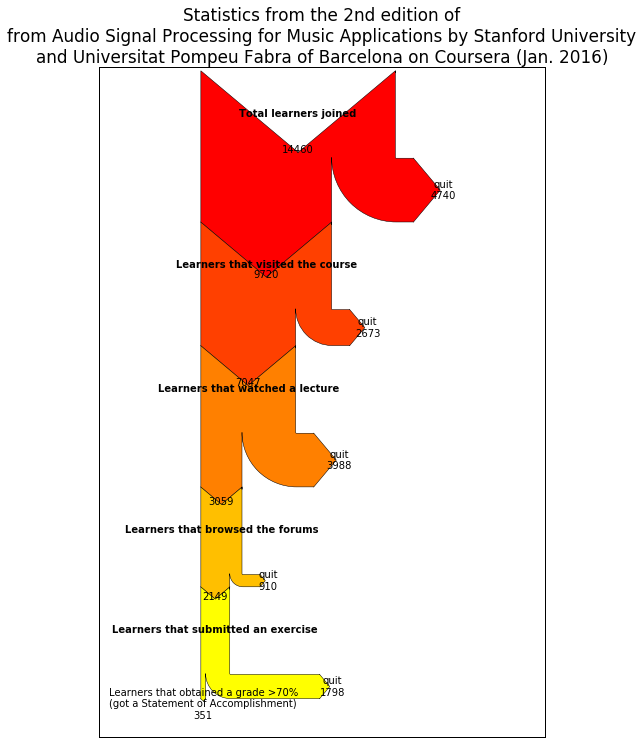

In [37]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Statistics from the 2nd edition of\nfrom Audio Signal Processing for Music Applications by Stanford University\nand Universitat Pompeu Fabra of Barcelona on Coursera (Jan. 2016)")
learners = [14460, 9720, 7047, 3059, 2149, 351]
labels = ["Total learners joined", "Learners that visited the course", "Learners that watched a lecture",
         "Learners that browsed the forums", "Learners that submitted an exercise", 
          "Learners that obtained a grade >70%\n(got a Statement of Accomplishment)"]
colors = ["#FF0000", "#FF4000", "#FF8000", "#FFBF00", "#FFFF00"]

sankey = Sankey(ax=ax, scale=0.0015, offset=0.3)
for input_learner, output_learner, label, prior, color in zip(learners[:-1], learners[1:], 
                                                              labels, [None, 0, 1, 2, 3],
                                                             colors):
    if prior != 3:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', None, 'quit'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 2],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
    else:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', labels[-1], 'quit'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 10],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
ylim = plt.ylim()
p =plt.ylim(ylim[0]*1.05, ylim[1])